# load dataset from shinnosuke

In [6]:
import cupy as cp
from shinnosuke.datasets import figure_gesture
from shinnosuke.layers.Convolution import Conv2D,MaxPooling2D
from shinnosuke.layers.Activation import Activation
from shinnosuke.layers.Normalization import BatchNormalization
from shinnosuke.layers.FC import Flatten,Dense
from shinnosuke.layers.Base import Input
from shinnosuke.models import Model
from shinnosuke.utils.Preprocess import to_categorical
from shinnosuke.utils.Optimizers import StochasticGradientDescent

In [2]:
batch_size = 256
num_classes = 6
epochs = 50

# load data

In [3]:
train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes=figure_gesture.load_data()

trainX=train_set_x_orig/255  

testX=test_set_x_orig/255

trainy=to_categorical(train_set_y_orig)
testy=to_categorical(test_set_y_orig)

print('x_train shape:',trainX.shape)
print('y_train shape:',trainy.shape)
print('x_test shape:',testX.shape)
print('y_test shape:',testy.shape)


x_train shape: (1080, 3, 64, 64)
y_train shape: (1080, 6)
x_test shape: (120, 3, 64, 64)
y_test shape: (120, 6)


# show a picture of data

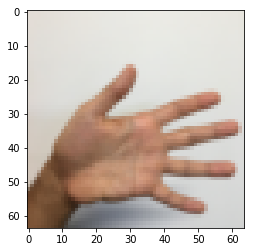

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
# rerange the data to channel last as we want to show it
show_img=trainX[0].transpose(1,2,0)
plt.imshow(show_img)

# If use Convolutional networks in shinnosuke,remember that data fotmat must be (batch_size,channels,height,width)

In [7]:
X_input=Input(shape=(None,3,64,64))
X=Conv2D(8,(5,5),padding='VALID',initializer='normal',activation='relu')(X_input)
X=BatchNormalization(axis=1)(X)
X=MaxPooling2D((4,4))(X)
X=Conv2D(16,(3,3),padding='VALID',initializer='normal',activation='relu')(X)
X=MaxPooling2D((4,4))(X)
X=Flatten()(X)
X=Dense(6,activation='softmax',initializer='normal')(X)
model=Model(inputs=X_input,outputs=X)
model.compile(optimizer=StochasticGradientDescent(lr=0.1),loss='sparse_categorical_cross_entropy')
model.fit(trainX,trainy,batch_size=batch_size,epochs=epochs,validation_data=(testX,testy))
score = model.evaluate(testX, testy)
print('Test loss:', score[1])
print('Test accuracy:', score[0])

 Epoch[1/50]
1080/1080 [==============================>] -2s -452ms/batch -batch_loss: 1.6824 -batch_acc: 0.2143 -val_loss: 1.7985 -val_acc: 0.1667
 Epoch[2/50]
1080/1080 [==============================>] -2s -400ms/batch -batch_loss: 1.6428 -batch_acc: 0.4286 -val_loss: 1.7974 -val_acc: 0.1667
 Epoch[3/50]
1080/1080 [==============================>] -2s -347ms/batch -batch_loss: 1.6592 -batch_acc: 0.3036 -val_loss: 1.8705 -val_acc: 0.1667
 Epoch[4/50]
1080/1080 [==============================>] -2s -356ms/batch -batch_loss: 1.5264 -batch_acc: 0.4107 -val_loss: 1.7877 -val_acc: 0.1667
 Epoch[5/50]
1080/1080 [==============================>] -2s -419ms/batch -batch_loss: 1.6166 -batch_acc: 0.4107 -val_loss: 1.7490 -val_acc: 0.2333
 Epoch[6/50]
1080/1080 [==============================>] -2s -402ms/batch -batch_loss: 1.4577 -batch_acc: 0.3393 -val_loss: 2.4635 -val_acc: 0.1667
 Epoch[7/50]
1080/1080 [==============================>] -2s -381ms/batch -batch_loss: 1.2900 -batch_acc: 0.4643

# Compare to Keras-gpu

In [8]:
import keras
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten,Input,Conv2D, MaxPooling2D,BatchNormalization,Activation

# Convert data to numpy array 

In [9]:
trainX=cp.asnumpy(trainX)
trainy=cp.asnumpy(trainy)
testX=cp.asnumpy(testX)
testy=cp.asnumpy(testy)

In [12]:
X_input=Input(shape=(3,64,64))
X=Conv2D(8,(5,5),padding='VALID',kernel_initializer='normal',activation='relu',data_format='channels_first')(X_input)
X=BatchNormalization(axis=1)(X)
X=MaxPooling2D((4,4))(X)
X=Conv2D(16,(3,3),padding='SAME',kernel_initializer='normal',activation='relu',data_format='channels_first')(X)
X=MaxPooling2D((4,4))(X)
X=Flatten()(X)
X=Dense(6,kernel_initializer='normal',activation='softmax')(X)
model=Model(inputs=X_input,outputs=X)
model.compile(optimizer=keras.optimizers.sgd(lr=0.1),loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(trainX,trainy,batch_size=batch_size,epochs=epochs,validation_data=(testX,testy))
score = model.evaluate(testX, testy)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 1080 samples, validate on 120 samples
Epoch 1/50
1080/1080 [==============================] - 2s 1ms/step - loss: 1.7893 - acc: 0.1991 - val_loss: 2.2341 - val_acc: 0.2167
Epoch 2/50
1080/1080 [==============================] - 1s 582us/step - loss: 1.7418 - acc: 0.2685 - val_loss: 1.7823 - val_acc: 0.1750
Epoch 3/50
1080/1080 [==============================] - 1s 579us/step - loss: 1.7220 - acc: 0.2676 - val_loss: 6.9724 - val_acc: 0.1917
Epoch 4/50
1080/1080 [==============================] - 1s 576us/step - loss: 1.7523 - acc: 0.2963 - val_loss: 1.9221 - val_acc: 0.2750
Epoch 5/50
1080/1080 [==============================] - 1s 574us/step - loss: 1.6098 - acc: 0.4019 - val_loss: 13.4317 - val_acc: 0.1667
Epoch 6/50
1080/1080 [==============================] - 1s 576us/step - loss: 2.0057 - acc: 0.1944 - val_loss: 5.3820 - val_acc: 0.1667
Epoch 7/50
1080/1080 [==============================] - 1s 575us/step - loss: 1.7155 - acc: 0.2787 - val_loss: 3.1049 - val_acc: 0.1667
Ep

# We can see that shinnosuke-gpu performs better than Keras-gpu on both training and test datasets.And the same problem is the speed.Keras-gpu is faster than shinnosuke-gpu,that may due to  Keras-gpu is written by CUDA and most operations are conducted on GPU directly,while shinnosuke-gpu is written by cupy(a python library),so there exists frequency data exchanges between GPU and memory,which remarkably slow down the speed.I will try to solve this problem in the future.